In [ ]:
#temperature
#
#
#
#
#
#

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0

In [6]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

In [7]:

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | shache
Processing Record 2 of Set 1 | yorosso
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | adrar
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | cabra
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | yaring
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | zhangjiakou
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | srirampur
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | labuhan
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | chuy
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | pu

Processing Record 38 of Set 4 | nikolskoye
Processing Record 39 of Set 4 | neiafu
Processing Record 40 of Set 4 | krasnystaw
Processing Record 41 of Set 4 | nyurba
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | ahuimanu
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | kanye
Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | gbadolite
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 4 | sola
Processing Record 1 of Set 5 | saryagash
Processing Record 2 of Set 5 | praya
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | hilo
Processing Record 5 of Set 5 | minyar
Processing Record 6 of Set 5 | turayf
Processing Record 7 of Set 5 | mangan
Processing Record 8 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 5 | sistranda
City not found. Skipping...
Processing Record 10 of Set 5 | berlevag
Processing Record 11 of 

Processing Record 27 of Set 8 | clinton
Processing Record 28 of Set 8 | cap malheureux
Processing Record 29 of Set 8 | kavaratti
Processing Record 30 of Set 8 | sindi
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | alenquer
Processing Record 33 of Set 8 | balkhash
Processing Record 34 of Set 8 | auki
Processing Record 35 of Set 8 | ariquemes
Processing Record 36 of Set 8 | sladkovo
Processing Record 37 of Set 8 | fort dodge
Processing Record 38 of Set 8 | guarapari
Processing Record 39 of Set 8 | bakchar
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 8 | pichayevo
Processing Record 41 of Set 8 | coahuayana
Processing Record 42 of Set 8 | yeniseysk
Processing Record 43 of Set 8 | formosa
Processing Record 44 of Set 8 | muriwai beach
Processing Record 45 of Set 8 | nome
Processing Record 46 of Set 8 | ayagoz
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | buraydah
Processing Record 49 of Set

In [8]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [10]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [11]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,shache,0,CN,1577324294,71,38.42,77.24,19.47,3.71
1,yorosso,0,ML,1577324294,11,12.35,-4.78,63.79,7.31
2,hobart,20,AU,1577324023,46,-42.88,147.33,79.00,12.75
3,adrar,63,DZ,1577324288,50,27.87,-0.29,53.60,13.87
4,jamestown,59,AU,1577324076,15,-33.21,138.60,96.48,6.69


In [13]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [14]:
weather_dataframe.count()

City          522
Cloudiness    522
Country       522
Date          522
Humidity      522
Lat           522
Lng           522
Max Temp      522
Wind Speed    522
dtype: int64

In [15]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,shache,0,CN,1577324294,71,38.42,77.24,19.47,3.71
1,yorosso,0,ML,1577324294,11,12.35,-4.78,63.79,7.31
2,hobart,20,AU,1577324023,46,-42.88,147.33,79.00,12.75
3,adrar,63,DZ,1577324288,50,27.87,-0.29,53.60,13.87
4,jamestown,59,AU,1577324076,15,-33.21,138.60,96.48,6.69


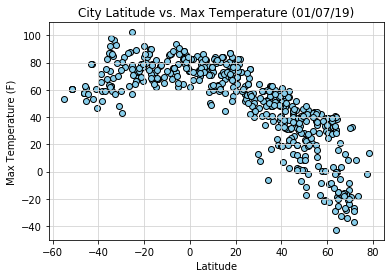

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

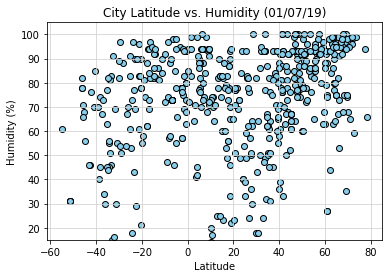

In [18]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

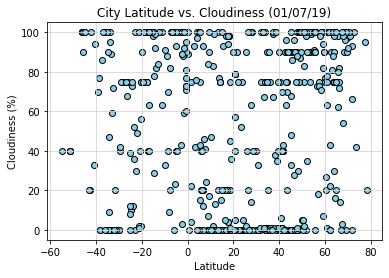

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

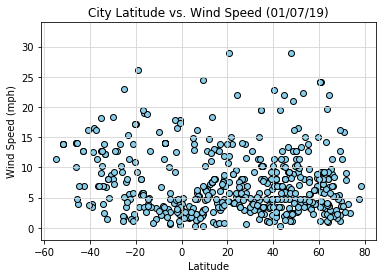

In [20]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()